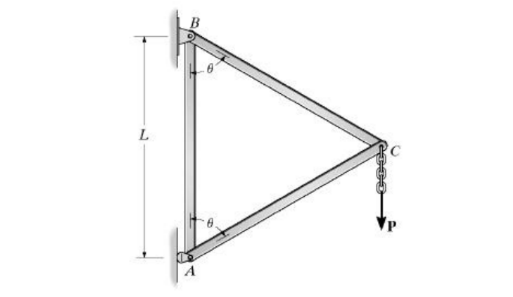
**Tração máxima 1.25P Compressão máxima 0.8P**

In [232]:
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
from tqdm import tqdm
from anastruct import SystemElements

In [233]:
L = 1
P = 1

In [234]:
theta = [angle for angle in range(10,60)]

In [235]:
compression = []
traction = []

In [236]:
for angle in tqdm(theta, leave=True, position=0):
    ss = SystemElements()
    
    nodes = {
        'A': (0, 0), 
        'B': (0, L),
        'C': ((L* np.tan(np.deg2rad(angle)))/2, L/2)
    }  

    cncts = [('A', 'C'), ('A', 'B'), ('B', 'C')]

    for connection in cncts:
        element_truss = [list(nodes.get(connection[0])), list(nodes.get(connection[1]))]
        ss.add_truss_element(location = element_truss)
        
    reation_A = ss.find_node_id(list(nodes.get('A')))
    reation_B = ss.find_node_id(list(nodes.get('B')))
    
    ss.add_support_roll(node_id=reation_A, direction=1)
    ss.add_support_hinged(node_id=reation_B)
    
    extern_load = -P
    
    for node in ['C']:
        extern_force_loc = ss.find_node_id(list(nodes.get(f'{node}')))
        ss.point_load(node_id=extern_force_loc, Fy=extern_load)
        
    ss.solve()
    forces = []
    elements = ss.get_element_results()
    
    for element in elements:
        forces.append(element['N'])
    compression.append(min(forces))
    traction.append(max(forces))    
    

100%|████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1014.04it/s]


In [237]:
results_dataframe = pd.DataFrame(list(zip(compression, traction, theta)), columns =['Compressão', 'Tração', 'Theta'])
results_dataframe = results_dataframe.set_index('Theta')
results_dataframe.head(10)

,Compressão,Tração
Theta,,
10,-0.507713,0.507713
11,-0.509358,0.509358
12,-0.511170,0.511170
13,-0.513152,0.513152
14,-0.515307,0.515307
15,-0.517638,0.517638
16,-0.520150,0.520150
17,-0.522846,0.522846
18,-0.525731,0.525731


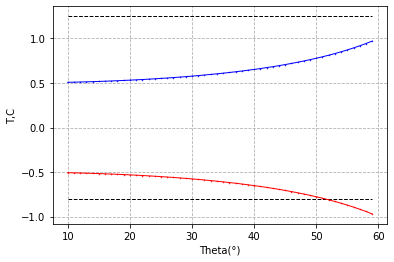

In [238]:

plt.plot(theta, compression, lw=1, color='red', marker='o', markersize=0.5)
plt.plot(theta, traction, lw=1, color='blue', marker='o', markersize=0.5)
plt.grid(linestyle='--')
plt.hlines(y=1.25*P, xmin=theta[0], xmax=theta[-1], lw=1, linestyle='--', color='black')
plt.hlines(y=-0.8*P, xmin=theta[0], xmax=theta[-1], lw=1, linestyle='--', color='black')
plt.xlabel(f'Theta(°)')
plt.ylabel('T,C')
plt.show()